# News Headline Generator 
---

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

## Importing Dataset

In [4]:
import zipfile
import os

zip_file_name = "dataset.zip"

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("news_data") 

os.listdir("news_data")

['.ipynb_checkpoints', 'News_Category_Dataset_v3.json']

In [5]:
df = pd.read_json("news_data/News_Category_Dataset_v3.json", lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


## Data Pre-processing

In [6]:
df.shape

(209527, 6)

In [15]:
data = df.sample(n=7500, random_state=42)

In [16]:
data.shape

(7500, 6)

In [17]:
data.head()

,link,headline,category,short_description,authors,date
128310,https://www.huffingtonpost.com/entry/what-if-w...,What If We Were All Family Generation Changers?,IMPACT,"What if, in doing so, we won't just create new...","Matt Murrie, ContributorEdupreneur, Cofounder/...",2014-06-20
139983,https://www.huffingtonpost.comhttp://www.washi...,Firestorm At AOL Over Employee Benefit Cuts,BUSINESS,It should have been a glorious week for AOL ch...,,2014-02-08
42339,https://www.huffingtonpost.com/entry/time-runs...,Dakota Access Protesters Arrested As Deadline ...,POLITICS,A few protesters who refused to leave remained...,"Michael McLaughlin & Josh Morgan, The Huffingt...",2017-02-22
131494,https://www.huffingtonpost.com/entry/one-glimp...,One Glimpse Of These Baby Kit Foxes And You'll...,GREEN,,,2014-05-14
163649,https://www.huffingtonpost.com/entry/mens-swea...,"Mens' Sweat Pheromone, Androstadienone, Influe...",SCIENCE,Scientists didn't know if humans played that g...,Melissa Cronin,2013-06-02


In [18]:
print(data.isnull().sum())

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


In [19]:
data = data[['short_description', 'headline']].dropna()

In [20]:
data

,short_description,headline
128310,"What if, in doing so, we won't just create new...",What If We Were All Family Generation Changers?
139983,It should have been a glorious week for AOL ch...,Firestorm At AOL Over Employee Benefit Cuts
42339,A few protesters who refused to leave remained...,Dakota Access Protesters Arrested As Deadline ...
131494,,One Glimpse Of These Baby Kit Foxes And You'll...
163649,Scientists didn't know if humans played that g...,"Mens' Sweat Pheromone, Androstadienone, Influe..."
...,...,...
39300,"You know, since Trump won the election...","Yes, Jewel Realizes That Ann Coulter Burn Is N..."
121111,,Candace Cameron Bure Shares Makeup-Free Selfie
81514,PB&J fo lyfe.,Kylie Jenner's Peanut Butter Shirt Tops Our Ch...
140345,A few studies have been conducted and found st...,The Health Benefits Of Pets on Newborns


## Importing NLP Libraries

In [21]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [22]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
#Loading stopwords
stopword = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())

## Data Cleaning

In [24]:
def cleaning_short_description(short_description):
    
    short_description = re.sub(r"\S*https?:\S*", "", short_description)  #Removes Links
    
    short_description = short_description.lower() # Lowers texts
    
    short_description = short_description.translate(str.maketrans("","", string.punctuation)) #Removes Punctuation
    
    short_description = short_description.replace(chr(39), "")  #Remove Apostrophes(')

    tokens = word_tokenize(short_description) #Tokenizing short_description
    
    # Stop word removal
    text_tokens = [tk for tk in tokens if tk not in stopword]
            
    # removing words with length less than 2
    final_tokens = []
    for token in text_tokens:
        if len(token) > 1:
            final_tokens.append(token)
            
    return ' '.join(final_tokens)

In [25]:
nltk.download('punkt_tab')
cleaned_texts = [cleaning_short_description(i) for i in data.short_description]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
def cleaning_headline(text):
    
    text = re.sub(r"\S*https?:\S*", "", text) ## Removes Links
    
    text = text.lower() ## Lowers texts
    
    text = text.translate(str.maketrans("","", string.punctuation)) ## Removes Punctuation
    
    text = re.sub(r"'s\b","",text)
    text = re.sub("[^a-zA-Z]", " ", text)

    tokens = word_tokenize(text) # Tokenizing Text

    final_tokens = []
    for token in tokens:
        if len(token) > 1:
            final_tokens.append(token)
            
    return ' '.join(final_tokens)

In [27]:
cleaned_headline = []
for i in data.headline:
    cleaned_headline.append(cleaning_headline(i))

In [28]:
data['cleaned_text'] = cleaned_texts
data['cleaned_headline'] = cleaned_headline

In [29]:
news = data.cleaned_text
headline = data.cleaned_headline
news_len = []
headline_len = []
for i in data.cleaned_text:
    news_len.append(len(i.split()))
for i in data.cleaned_headline:
    headline_len.append(len(i.split()))

In [30]:
max(news_len), max(headline_len)

(92, 26)

In [31]:
max_len_news=92
max_summary_len=26

In [32]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_headline'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_len_news):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [33]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

### Required Dataset

In [34]:
df.head()

,text,summary
0,wont create new opportunities well also uncove...,sostok what if we were all family generation c...
1,glorious week aol chief executive tim armstron...,sostok firestorm at aol over employee benefit ...
2,protesters refused leave remained site thursday,sostok dakota access protesters arrested as de...
3,,sostok one glimpse of these baby kit foxes and...
4,scientists didnt know humans played game well ...,sostok mens sweat pheromone androstadienone in...


In [44]:
# Drop rows where either is missing or empty
df = df[df['text'].str.strip().astype(bool)]
df = df[df['summary'].str.strip().astype(bool)]

df = df.reset_index(drop=True)

In [45]:
df.head()

,text,summary
0,wont create new opportunities well also uncove...,sostok what if we were all family generation c...
1,glorious week aol chief executive tim armstron...,sostok firestorm at aol over employee benefit ...
2,protesters refused leave remained site thursday,sostok dakota access protesters arrested as de...
3,scientists didnt know humans played game well ...,sostok mens sweat pheromone androstadienone in...
4,five ways get beauty sleep hosting sleepover c...,sostok summer sleepover tips eostok


In [46]:
for i in range(10):
    print("News: ", df.text[i])
    print("Headline: ", df.summary[i])
    print()

News:  wont create new opportunities well also uncover ways create new opportunities families may otherwise existed
Headline:  sostok what if we were all family generation changers eostok

News:  glorious week aol chief executive tim armstrong company quarterly earnings announced thursday
Headline:  sostok firestorm at aol over employee benefit cuts eostok

News:  protesters refused leave remained site thursday
Headline:  sostok dakota access protesters arrested as deadline passes to depart camp eostok

News:  scientists didnt know humans played game well last 30 years theyve identified male female
Headline:  sostok mens sweat pheromone androstadienone influences cooperation in other men eostok

News:  five ways get beauty sleep hosting sleepover child
Headline:  sostok summer sleepover tips eostok

News:  moment let wonder let mind wander youve part year things things could offer opportunity improve performance
Headline:  sostok end of the year eostok

News:  michael preston ucf forum

## Splitting the dataset into train and validation sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.summary, test_size=0.2, random_state=101, shuffle=True)

In [48]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, Concatenate, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from attention_bahdanau_model import AttentionLayer

## Tokenizing text

In [49]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(X_train))

In [50]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 77.78568655364307
Total Coverage of rare words: 25.767353036300072


In [51]:
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

X_train_seq = X_tokenizer.texts_to_sequences(X_train)
X_test_seq = X_tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train_seq, maxlen = max_len_news, padding='post')
X_test = pad_sequences(X_test_seq, maxlen = max_len_news, padding='post')

news_vocab_size = len(X_tokenizer.word_index) + 1

In [52]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

In [53]:
thresh=2

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 56.78337960060894
Total Coverage of rare words: 10.382826827351323


In [54]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')
y_voc_size = len(y_tokenizer.word_index) + 1

In [55]:
y_tokenizer.word_counts['eostok'], len(y_train)

(5411, 5411)

## Build and train the model

In [56]:
latent_dim=300
emb_dim=100

enc_inputs = Input(shape=(max_len_news,))
embedding1 = Embedding(news_vocab_size,emb_dim, trainable=True)(enc_inputs)

lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
enc_output1, h1, c1 = lstm1(embedding1)

lstm2 = LSTM(latent_dim, return_sequences=True,return_state=True, dropout=0.3, recurrent_dropout=0.2)
enc_output2, h2, c2 = lstm2(enc_output1)

lstm3 = LSTM(latent_dim, return_sequences=True,return_state=True, dropout=0.3, recurrent_dropout=0.2)
enc_outputs, h3, c3 = lstm3(enc_output2)


decoder_inputs = Input(shape=(None, ))
dec_embedding = Embedding(y_voc_size, emb_dim, trainable=True)
dec_emb_out = dec_embedding(decoder_inputs)

dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
decoder_outputs, fwd_state, back_state = dec_lstm(dec_emb_out, initial_state = [h3, c3])



attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_state = attn_layer([enc_outputs, decoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([enc_inputs, decoder_inputs], decoder_outputs)

In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 92)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 92, 100)           │       1,545,500 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ [(None, 92, 300), (None,  │         481,200 │ embedding[0][0]            │
│                               │ 300), (None, 300)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ [(None, 92, 300), (None,  │         721,200 │ lstm[0][0]                 │
│                               │ 300), (None, 300)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, None, 100)         │       1,116,800 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ [(None, 92, 300), (None,  │         721,200 │ lstm_1[0][0]               │
│                               │ 300), (None, 300)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_3 (LSTM)                 │ [(None, None, 300),       │         481,200 │ embedding_1[0][0],         │
│                               │ (None, 300), (None, 300)] │                 │ lstm_2[0][1], lstm_2[0][2] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_layer               │ [(None, None, 300),       │         180,300 │ lstm_2[0][0], lstm_3[0][0] │
│ (AttentionLayer)              │ (None, None, 92)]         │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_layer (Concatenate)    │ (None, None, 600)         │               0 │ lstm_3[0][0],              │
│                               │                           │                 │ attention_layer[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ time_distributed              │ (None, None, 11168)       │       6,711,968 │ concat_layer[0][0]         │
│ (TimeDistributed)             │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 11,959,368 (45.62 MB)

 Trainable params: 11,959,368 (45.62 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [59]:
es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=40)
rl = ReduceLROnPlateau(monitor='val_accuracy',mode='max',verbose=1,patience=5,factor=0.1,min_lr=0.001)  #val accuracy stops improving for 5 epochs, the learning rate is reduced

In [61]:
from keras.callbacks import ModelCheckpoint

checkpoint_path = "final_checkpoints/best_model.keras"  
mc = ModelCheckpoint(filepath=checkpoint_path,
                     monitor='val_accuracy',
                     mode='max',
                     save_best_only=True,
                     verbose=1)

In [62]:
history=model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50, batch_size=128, callbacks=[es, rl, mc], validation_data=([X_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5307 - loss: 5.8803
Epoch 1: val_accuracy improved from -inf to 0.67169, saving model to final_checkpoints/best_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 316s 7s/step - accuracy: 0.5317 - loss: 5.8440 - val_accuracy: 0.6717 - val_loss: 2.6125 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6298 - loss: 3.0634
Epoch 2: val_accuracy improved from 0.67169 to 0.68083, saving model to final_checkpoints/best_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - accuracy: 0.6299 - loss: 3.0637 - val_accuracy: 0.6808 - val_loss: 2.5183 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6360 - loss: 2.9546
Epoch 3: val_accuracy improved from 0.68083 to 0.68160, saving model to final_checkpoints/best_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 345s 8s/step - accuracy: 0.6360 - loss: 2.9553 - val_accuracy: 0.6816 - val_loss: 2.4979 - learning_rate: 0.0010
Epoch 4/50
43

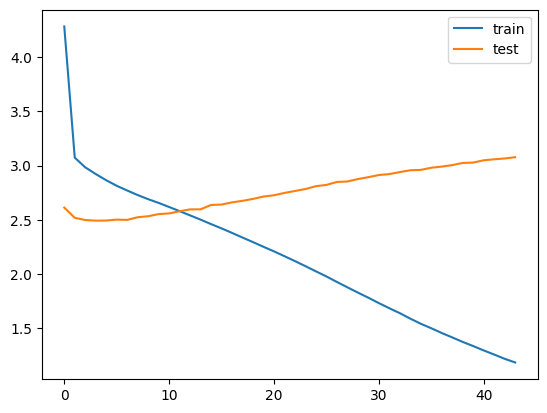

In [63]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

## Inference Model

In [64]:
reverse_target_word_index = y_tokenizer.index_word
reverse_news_words_index = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [65]:
encoder_model = Model(inputs = enc_inputs, outputs = [enc_outputs, h3, c3])  # h3, c3 -> The final hidden and cell states from the encoder’s last LSTM layer

decoder_h = Input(shape=(latent_dim,))
decoder_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_news, latent_dim))


dec_emb2 = dec_embedding(decoder_inputs)

dec_output2, dec_h2, dec_c2 = dec_lstm(dec_emb2, initial_state=[decoder_h, decoder_c])

attn_out_inf, attn_state_inf = attn_layer([decoder_hidden_state_input, dec_output2])

dec_inf_concat = Concatenate(axis=-1, name='concat')([dec_output2, attn_out_inf])
dec_output2 = decoder_dense(dec_inf_concat)


decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input, decoder_h, decoder_c], [dec_output2] + [dec_h2, dec_c2])

In [66]:
decoder_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, None, 100)         │       1,116,800 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_2 (InputLayer)    │ (None, 300)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_3 (InputLayer)    │ (None, 300)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_3 (LSTM)                 │ [(None, None, 300),       │         481,200 │ embedding_1[1][0],         │
│                               │ (None, 300), (None, 300)] │                 │ input_layer_2[0][0],       │
│                               │                           │                 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_4 (InputLayer)    │ (None, 92, 300)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_layer               │ [(None, None, 300),       │         180,300 │ input_layer_4[0][0],       │
│ (AttentionLayer)              │ (None, None, 92)]         │                 │ lstm_3[1][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat (Concatenate)          │ (None, None, 600)         │               0 │ lstm_3[1][0],              │
│                               │                           │                 │ attention_layer[1][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ time_distributed              │ (None, None, 11168)       │       6,711,968 │ concat[0][0]               │
│ (TimeDistributed)             │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 8,490,268 (32.39 MB)

 Trainable params: 8,490,268 (32.39 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
def decode_sequence(input_sequence):
    e_out, e_h, e_c = encoder_model(input_sequence)

    target_seq = np.zeros((1,1))

    target_seq[0,0] = target_word_index['sostok'] ## We always start with sostok

    stop_condition = False


    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        
        sample_token_index = np.argmax(output_tokens[0,-1,:])
        sampled_token = reverse_target_word_index[sample_token_index]

        if sampled_token!='eostok':
            decoded_sentence+= ' ' + sampled_token

        if (sampled_token=='eostok' or len(decoded_sentence.split())>=(max_summary_len-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))

        target_seq[0,0] = target_word_index[sampled_token]


        e_h, e_c = h, c

    return decoded_sentence

In [68]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
        newString = newString + reverse_target_word_index[i] + ' '
    return newString

def seq2text(input_seq):
    newString = ''
    for i in input_seq:
      if(i!=0):
        newString = newString + reverse_news_words_index[i] + ' '
    return newString

In [69]:
for i in range(1, 4):
  print("Review:",seq2text(X_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  print("Predicted summary:",decode_sequence(X_test[i].reshape(1,max_len_news)))
  print("\n")

Review: beyond romantic love exists universal love free conditions valentines day 
Original summary: valentines day the way 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted summary:  polio may be worker by the least decade shed memo


Review: seems declared dc fan 
Original summary: this little girl just learned an awesome new word 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━